# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [49]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [50]:
# API URL + api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 


city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Counters
record_count = 1
set_count = 1



# Loop through cities
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL for each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # if error
    except:
        pass
              
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kristiinankaupunki
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | vangaindrano
Processing Record 4 of Set 1 | saskylakh
Processing Record 5 of Set 1 | christchurch
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | yerbogachen
Processing Record 9 of Set 1 | pevek
Processing Record 10 of Set 1 | mareeba
Processing Record 11 of Set 1 | batsfjord
Processing Record 12 of Set 1 | bilma
Processing Record 13 of Set 1 | qasigiannguit
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | bambanglipuro
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | taolanaro
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | los llanos de aridane
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | geraldton
Processing Record 22 of Set 1 | vaini


Processing Record 47 of Set 4 | saleaula
Processing Record 48 of Set 4 | cayenne
Processing Record 49 of Set 4 | dolbeau
Processing Record 0 of Set 5 | bengkulu
Processing Record 1 of Set 5 | walvis bay
Processing Record 2 of Set 5 | iqaluit
Processing Record 3 of Set 5 | basco
Processing Record 4 of Set 5 | faya
Processing Record 5 of Set 5 | marcona
Processing Record 6 of Set 5 | ketchikan
Processing Record 7 of Set 5 | birjand
Processing Record 8 of Set 5 | lucea
Processing Record 9 of Set 5 | port hardy
Processing Record 10 of Set 5 | eenhana
Processing Record 11 of Set 5 | melekhovskaya
Processing Record 12 of Set 5 | phonhong
Processing Record 13 of Set 5 | belmonte
Processing Record 14 of Set 5 | ribeira grande
Processing Record 15 of Set 5 | nanortalik
Processing Record 16 of Set 5 | pelym
Processing Record 17 of Set 5 | provideniya
Processing Record 18 of Set 5 | kloulklubed
Processing Record 19 of Set 5 | daru
Processing Record 20 of Set 5 | raudeberg
Processing Record 21 of 

Processing Record 46 of Set 8 | kerman
Processing Record 47 of Set 8 | bacolod
Processing Record 48 of Set 8 | kibala
Processing Record 49 of Set 8 | lata
Processing Record 0 of Set 9 | fairbanks
Processing Record 1 of Set 9 | dunedin
Processing Record 2 of Set 9 | eureka
Processing Record 3 of Set 9 | gladstone
Processing Record 4 of Set 9 | port lincoln
Processing Record 5 of Set 9 | samusu
Processing Record 6 of Set 9 | xining
Processing Record 7 of Set 9 | guatire
Processing Record 8 of Set 9 | gbarnga
Processing Record 9 of Set 9 | ziro
Processing Record 10 of Set 9 | tessalit
Processing Record 11 of Set 9 | irig
Processing Record 12 of Set 9 | yumen
Processing Record 13 of Set 9 | sitka
Processing Record 14 of Set 9 | beni suef
Processing Record 15 of Set 9 | newport
Processing Record 16 of Set 9 | pahrump
Processing Record 17 of Set 9 | beloha
Processing Record 18 of Set 9 | baykit
Processing Record 19 of Set 9 | salme
Processing Record 20 of Set 9 | alyangula
Processing Record 

Processing Record 43 of Set 12 | severo-yeniseyskiy
Processing Record 44 of Set 12 | kamiiso
Processing Record 45 of Set 12 | coracao de jesus
Processing Record 46 of Set 12 | piacabucu
Processing Record 47 of Set 12 | finschhafen
Processing Record 48 of Set 12 | artyk
Processing Record 49 of Set 12 | ilhabela
Processing Record 0 of Set 13 | lofthus
Processing Record 1 of Set 13 | skagastrond
Processing Record 2 of Set 13 | acarau
Processing Record 3 of Set 13 | pochutla
Processing Record 4 of Set 13 | luwuk
Processing Record 5 of Set 13 | urumqi
Processing Record 6 of Set 13 | fortuna
Processing Record 7 of Set 13 | bertoua
Processing Record 8 of Set 13 | putina
Processing Record 9 of Set 13 | sao domingos
Processing Record 10 of Set 13 | lasa
Processing Record 11 of Set 13 | lannion
Processing Record 12 of Set 13 | ijaki
Processing Record 13 of Set 13 | lixourion
Processing Record 14 of Set 13 | yuzawa
Processing Record 15 of Set 13 | blagoyevo
Processing Record 16 of Set 13 | tsieny

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [51]:
# Convert array of JSONs into Pandas DataFrame
df_city = pd.DataFrame(city_data)


# Extract relevant fields from the data frame
lats = df_city["Lat"]
max_temps = df_city["Max Temp"]
humidity = df_city["Humidity"]
cloudiness = df_city["Cloudiness"]
wind_speed = df_city["Wind Speed"]

# Export the City_Data into a csv
df_city.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
df_city.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [52]:
# Display the City Data Frame
df_city.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kristiinankaupunki,62.27,21.38,38.08,88,100,8.61,FI,1586378670
1,ushuaia,-54.80,-68.30,68.00,32,15,11.41,AR,1586378670
2,vangaindrano,-23.35,47.60,72.84,91,15,1.61,MG,1586378670
3,saskylakh,71.92,114.08,22.84,98,97,3.87,RU,1586378670
4,christchurch,-43.53,172.63,54.00,81,73,6.93,NZ,1586378670


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

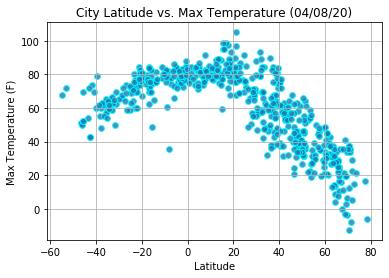

In [53]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="cyan", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Temp.png")

# Show plot
plt.show()

Observable Trends:
As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestngly, however, is the fact that the southern hemisphere tends to be warmer this time of year in the northen hemisphere. This may be due to the tilt of the earth at the time of the year this data was gathered.


#### Latitude vs. Humidity Plot

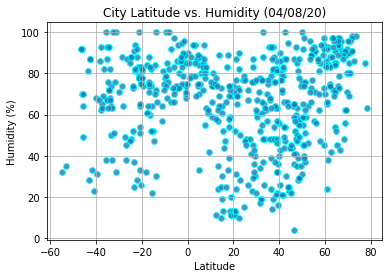

In [54]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="cyan", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Humidity.png")

# Show plot
plt.show()

Observable Trends: Across the northern and southern hemispheres, between the latitude of -30 Deg and 60 Deg, the hemispheres can regularly reach a percentage of 100% humidity. However, the data shows that as one would approach the equator, they would experience dryer humidity at 20% between the equator and the 40th Deg latitude as well as between the between the -20 to -40th degress. This may be due to the persistent heat the equatorial region receives, leaving less moisture for humidity.

#### Latitude vs. Cloudiness Plot

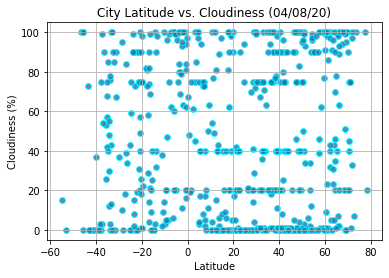

In [55]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="cyan", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Cloud.png")

# Show plot
plt.show()

Observable Trends: The cloudiness dataset does not show a clear trend of evidence proving that latitude has an impact on cloudy weather. Across lines of latitude between 80 and -60 degrees, cloudiness percentage ranges from 0% to 90%. The equator sees the full spectrum of equally cloud and cloud-less days. A noticable observation between the 10 and 45 degree lines of latitude does show that those regions are less likely to see cloudy days of 40% to 60% cloudiness.

#### Latitude vs. Wind Speed Plot

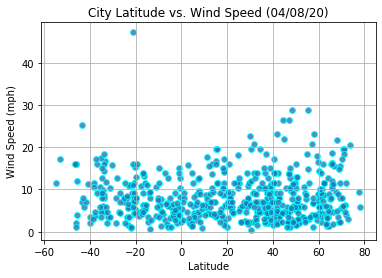

In [56]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="cyan", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Wind.png")

# Show plot
plt.show()

Observable Trends: Wind speeds are noticeably calm at 0 to 5 mph across most observations shown in the 80 to -20 degree lines of latitude with peaks in wind speed at the 60 degree and -40 degree lines of latitude. Top wind speeds are observed at 35 mph between 40 and 80 degree lines of latitude. A significant drop in wind speed is also observed at 15 mph and less between the -20 to 0 degree lines of latitude. Natural events such as the global polar and tropical jet streams could have had an impact on wind speed observations at the time this data was collected.